C:\Users\Sina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

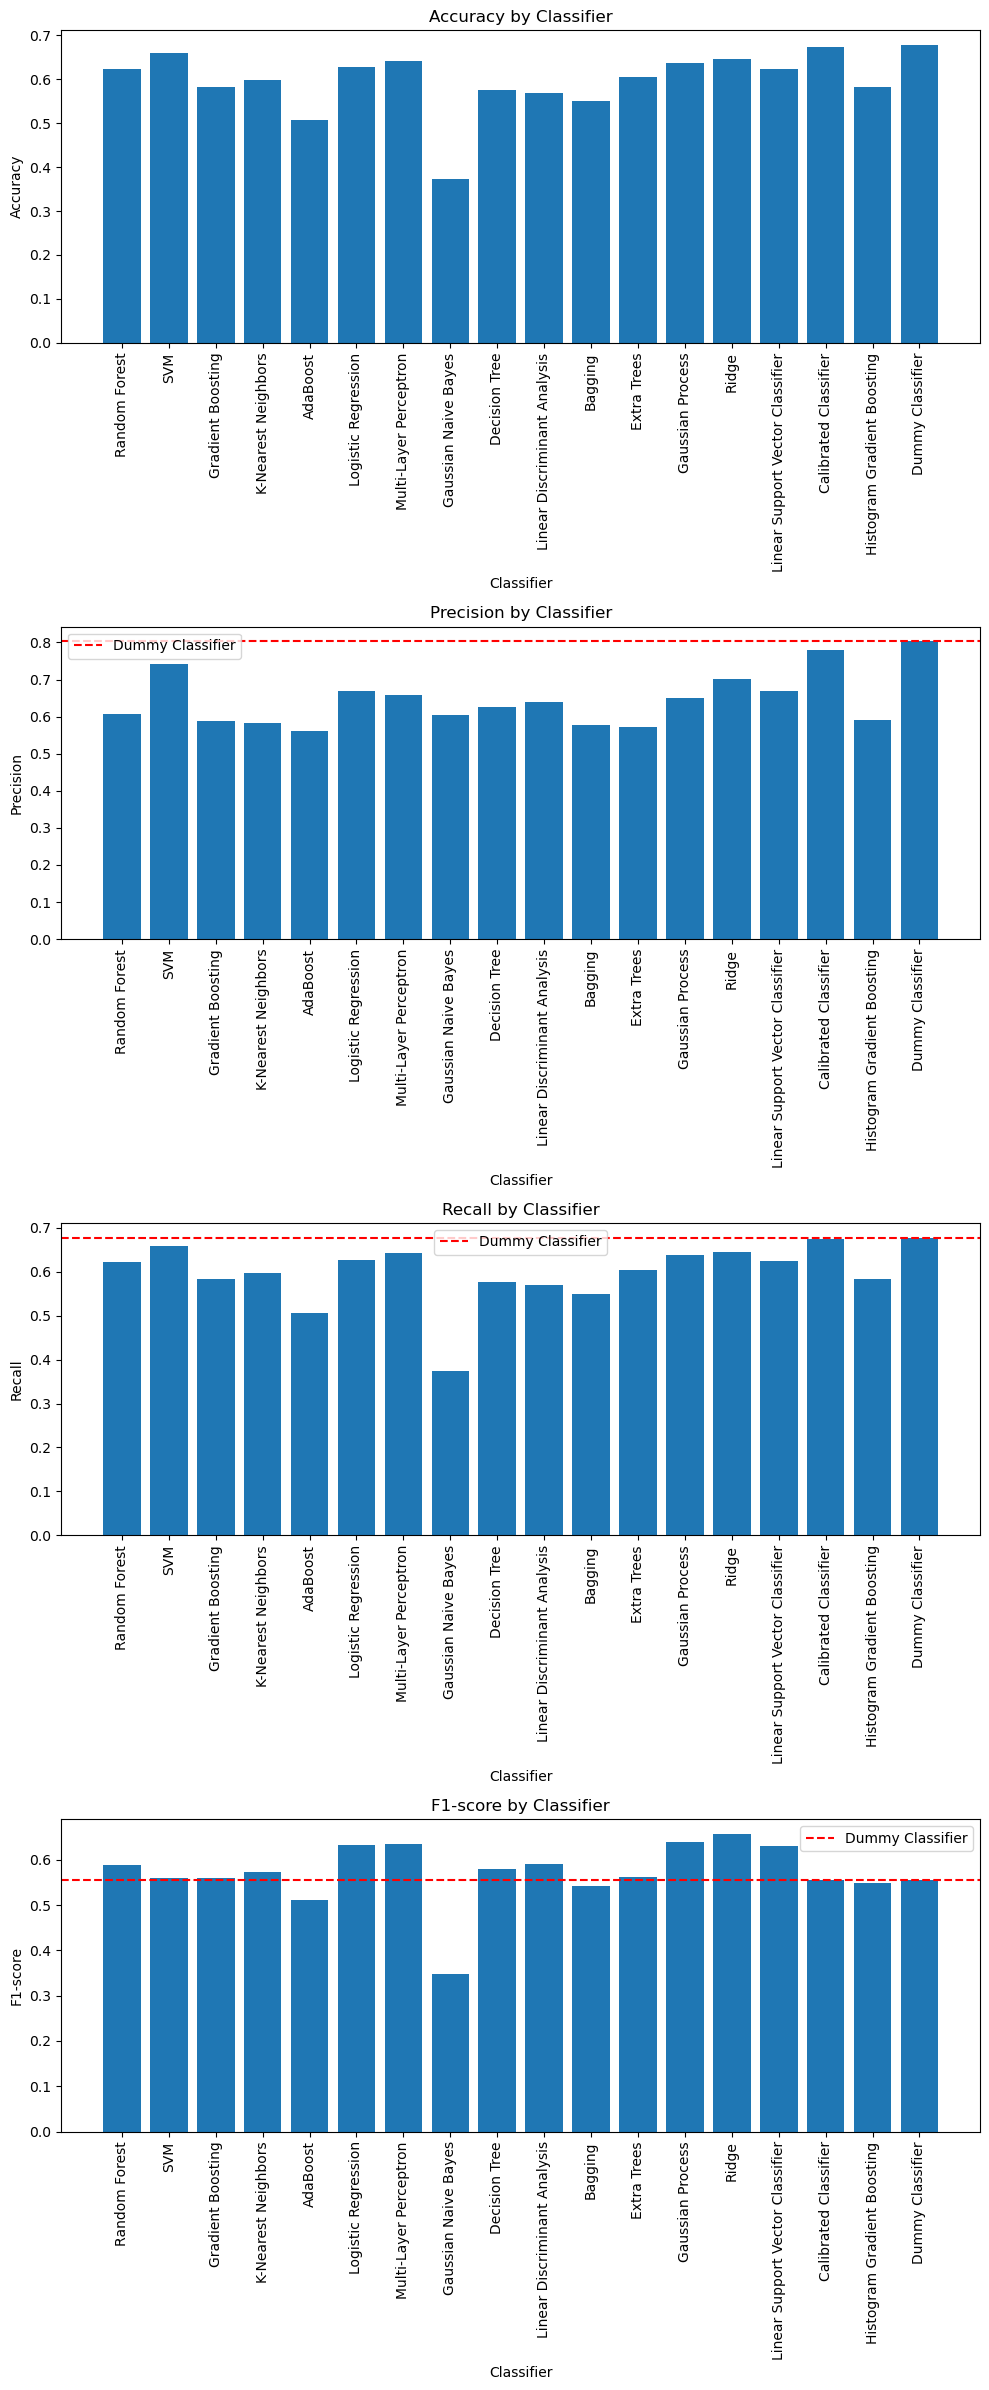

In [4]:
#without feature selection
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3112)

def perform_cross_validation(classifier, classifier_name):
    # Read the TSV file
    data = pd.read_csv("C:/Users/Sina/Desktop/Stage V2/Sripts/emdat and openface clean up/merged_data10.tsv", delimiter='\t')

    # Separate features (X) and target variable (y)
    X = data.drop(["answer_openface", "Sc_id", "Part_id"], axis=1)
    y = data["answer_openface"]

    # Replace infinite values with np.nan
    X = X.replace([np.inf, -np.inf], np.nan)

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Scale the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Initialize the GroupKFold cross-validator
    group_kfold = GroupKFold(n_splits=5)

    # Perform cross-validation
    metrics = []
    accuracies = []
    for train_index, test_index in group_kfold.split(X, y, groups=data["Part_id"]):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Create and train the classifier
        clf = classifier()
        clf.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = clf.predict(X_test)

        # Calculate classification report
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
        accuracy = accuracy_score(y_test, y_pred)
        metrics.append(report)
        accuracies.append(accuracy)

    # Calculate average metrics across all folds
    average_metrics = {}
    for metric in metrics[0]['weighted avg'].keys():
        if metric == 'support':
            continue
        average_metrics[metric] = np.mean([m['weighted avg'][metric] for m in metrics])

    average_metrics['accuracy'] = np.mean(accuracies)

    # Return classification report and accuracy
    return classifier_name, average_metrics

classifiers = [
    (RandomForestClassifier, "Random Forest"),
    (SVC, "SVM"),
    (GradientBoostingClassifier, "Gradient Boosting"),
    (KNeighborsClassifier, "K-Nearest Neighbors"),
    (AdaBoostClassifier, "AdaBoost"),
    (LogisticRegression, "Logistic Regression"),
    (MLPClassifier, "Multi-Layer Perceptron"),
    (GaussianNB, "Gaussian Naive Bayes"),
    (DecisionTreeClassifier, "Decision Tree"),
    (LinearDiscriminantAnalysis, "Linear Discriminant Analysis"),
    (BaggingClassifier, "Bagging"),
    (ExtraTreesClassifier, "Extra Trees"),
    (GaussianProcessClassifier, "Gaussian Process"),
    (RidgeClassifier, "Ridge"),
    (LinearSVC, "Linear Support Vector Classifier"),
    (CalibratedClassifierCV, "Calibrated Classifier"),
    (HistGradientBoostingClassifier, "Histogram Gradient Boosting"),
    (DummyClassifier, "Dummy Classifier")
]

import matplotlib.pyplot as plt

# Collect the results
results = []
metrics_list = ['accuracy', 'precision', 'recall', 'f1-score']
for classifier, classifier_name in classifiers:
    result = perform_cross_validation(classifier, classifier_name)
    results.append(result)

# Create a DataFrame from the results
df = pd.DataFrame(results, columns=["Classifier", "Metrics"])

# Create a crosstab DataFrame from the metrics
metrics_df = pd.DataFrame(df["Metrics"].to_list())
metrics_df.insert(0, "Classifier", df["Classifier"])

# Save the metrics DataFrame to a CSV file
metrics_df.to_csv("feature fusion20.csv", index=False)

# Generate bar graphs for each metric
num_metrics = len(metrics_list)
fig, axs = plt.subplots(num_metrics, 1, figsize=(10, 6*num_metrics))
fig.subplots_adjust(hspace=0.5)

for i, metric in enumerate(metrics_list):
    axs[i].bar(metrics_df["Classifier"], metrics_df[metric])
    axs[i].set_xlabel("Classifier")
    axs[i].set_ylabel(metric.capitalize())
    axs[i].set_title(f"{metric.capitalize()} by Classifier")
    axs[i].tick_params(axis='x', rotation=90)

    if metric != "accuracy":
        # Highlight Dummy Classifier result
        dummy_result = metrics_df.loc[metrics_df['Classifier'] == 'Dummy Classifier', metric].values[0]
        axs[i].axhline(dummy_result, color='red', linestyle='--', label='Dummy Classifier')
        axs[i].legend()

plt.tight_layout()
plt.show()




   


C:\Users\Sina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Sina\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


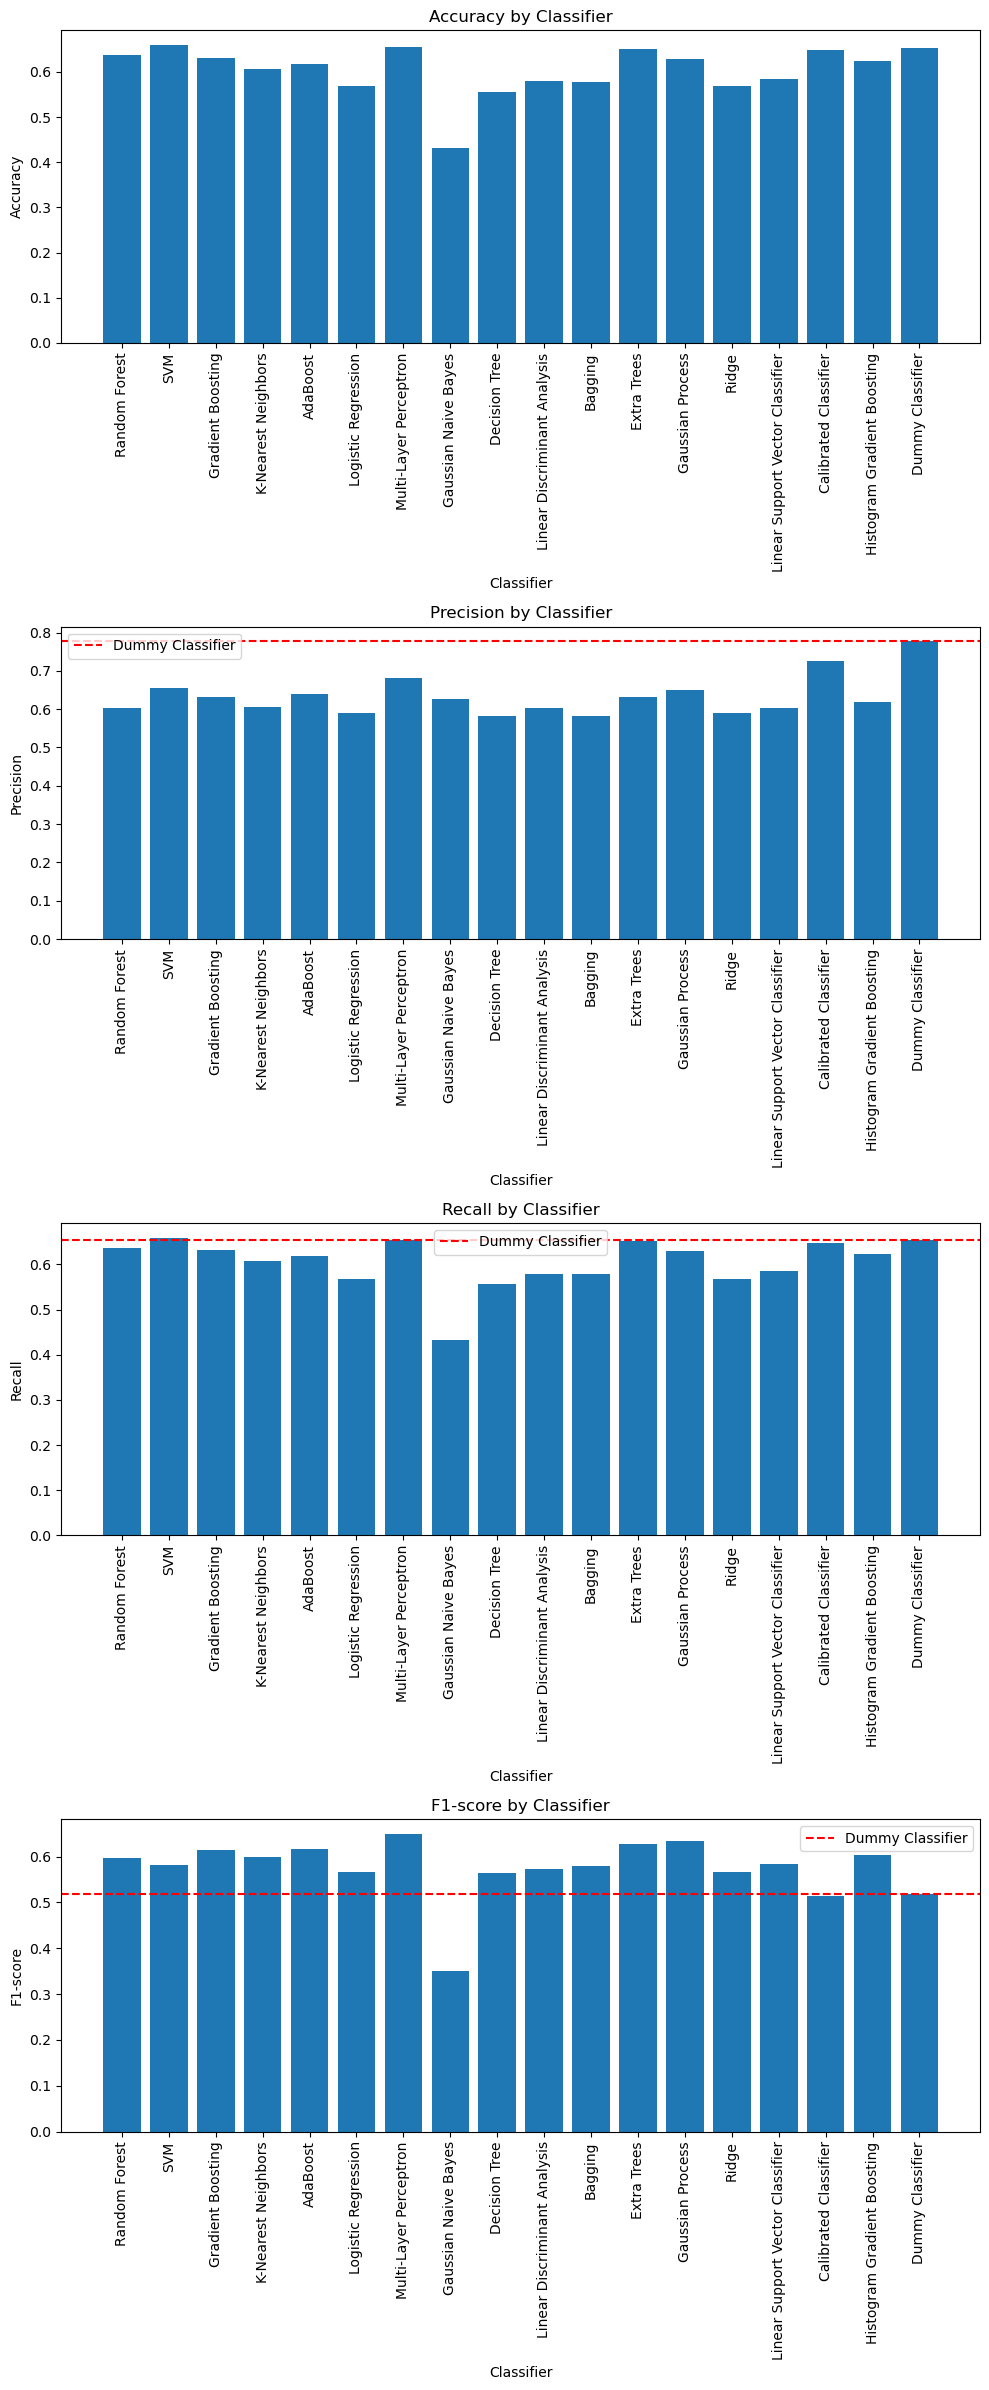

In [3]:
# with feature selection

import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3112)

def perform_cross_validation(classifier, classifier_name):
    # Read the TSV file
    data = pd.read_csv("C:/Users/Sina/Desktop/Stage V2/Sripts/emdat and openface clean up/merged_data20.tsv", delimiter='\t')

    # Separate features (X) and target variable (y)
    X = data.drop(["answer_openface", "Sc_id", "Part_id"], axis=1)
    y = data["answer_openface"]

    # Replace infinite values with np.nan
    X = X.replace([np.inf, -np.inf], np.nan)

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Scale the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Perform feature selection
    selector = VarianceThreshold()
    X = selector.fit_transform(X)

    # Initialize the GroupKFold cross-validator
    group_kfold = GroupKFold(n_splits=5)

    # Perform cross-validation
    metrics = []
    accuracies = []
    for train_index, test_index in group_kfold.split(X, y, groups=data["Part_id"]):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Create and train the classifier
        clf = classifier()
        clf.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = clf.predict(X_test)

        # Calculate classification report
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
        accuracy = accuracy_score(y_test, y_pred)
        metrics.append(report)
        accuracies.append(accuracy)

    # Calculate average metrics across all folds
    average_metrics = {}
    for metric in metrics[0]['weighted avg'].keys():
        if metric == 'support':
            continue
        average_metrics[metric] = np.mean([m['weighted avg'][metric] for m in metrics])

    average_metrics['accuracy'] = np.mean(accuracies)

    # Return classification report and accuracy
    return classifier_name, average_metrics

classifiers = [
    (RandomForestClassifier, "Random Forest"),
    (SVC, "SVM"),
    (GradientBoostingClassifier, "Gradient Boosting"),
    (KNeighborsClassifier, "K-Nearest Neighbors"),
    (AdaBoostClassifier, "AdaBoost"),
    (LogisticRegression, "Logistic Regression"),
    (MLPClassifier, "Multi-Layer Perceptron"),
    (GaussianNB, "Gaussian Naive Bayes"),
    (DecisionTreeClassifier, "Decision Tree"),
    (LinearDiscriminantAnalysis, "Linear Discriminant Analysis"),
    (BaggingClassifier, "Bagging"),
    (ExtraTreesClassifier, "Extra Trees"),
    (GaussianProcessClassifier, "Gaussian Process"),
    (RidgeClassifier, "Ridge"),
    (LinearSVC, "Linear Support Vector Classifier"),
    (CalibratedClassifierCV, "Calibrated Classifier"),
    (HistGradientBoostingClassifier, "Histogram Gradient Boosting"),
    (DummyClassifier, "Dummy Classifier")
]

import matplotlib.pyplot as plt

# Collect the results
results = []
metrics_list = ['accuracy', 'precision', 'recall', 'f1-score']
for classifier, classifier_name in classifiers:
    result = perform_cross_validation(classifier, classifier_name)
    results.append(result)

# Create a DataFrame from the results
df = pd.DataFrame(results, columns=["Classifier", "Metrics"])

# Create a crosstab DataFrame from the metrics
metrics_df = pd.DataFrame(df["Metrics"].to_list())
metrics_df.insert(0, "Classifier", df["Classifier"])

# Save the metrics DataFrame to a CSV file
metrics_df.to_csv("feature selection - feature_fusion20.csv", index=False)

# Generate bar graphs for each metric
num_metrics = len(metrics_list)
fig, axs = plt.subplots(num_metrics, 1, figsize=(10, 6*num_metrics))
fig.subplots_adjust(hspace=0.5)

for i, metric in enumerate(metrics_list):
    axs[i].bar(metrics_df["Classifier"], metrics_df[metric])
    axs[i].set_xlabel("Classifier")
    axs[i].set_ylabel(metric.capitalize())
    axs[i].set_title(f"{metric.capitalize()} by Classifier")
    axs[i].tick_params(axis='x', rotation=90)

    if metric != "accuracy":
        # Highlight Dummy Classifier result
        dummy_result = metrics_df.loc[metrics_df['Classifier'] == 'Dummy Classifier', metric].values[0]
        axs[i].axhline(dummy_result, color='red', linestyle='--', label='Dummy Classifier')
        axs[i].legend()

plt.tight_layout()
plt.show()
